<a href="https://colab.research.google.com/github/pravalithota/ProgrammingAssignment2/blob/master/Copy_of_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metrics Lab

1. Evaluate results for multiple models using a variety of metrics
2. Optimize parameters based on different metrics


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get Dataset

In [ ]:

from google.colab import files

uploaded = files.upload()
ls= list()
for fn in uploaded.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
    # Read the uploaded file into a pandas dataframe
  df = pd.read_csv(fn)
  ls.append(df)

print(ls[0])



Saving test.csv to test (3).csv
Saving train.csv to train (3).csv
Uploaded file "test (3).csv" with length 801109 bytes
Uploaded file "train (3).csv" with length 1250704 bytes
         id  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0     15000  15590011.0     Hsieh        661.0   Germany    Male  32.0   
1     15001  15769499.0   Lo Duca        525.0     Spain  Female  37.0   
2     15002  15783097.0     T'ien        585.0     Spain    Male  42.0   
3     15003  15626985.0     Ch'en        634.0    France    Male  39.0   
4     15004  15681924.0       Yeh        546.0    France    Male  40.0   
...     ...         ...       ...          ...       ...     ...   ...   
9995  24995  15629150.0    Gidney        678.0     Spain    Male  49.0   
9996  24996  15719348.0  Obiajulu        539.0    France    Male  37.0   
9997  24997  15733444.0     Hsing        812.0     Spain  Female  39.0   
9998  24998  15603883.0     Hsieh        849.0    France    Male  41.0   
9999  2499

In [ ]:
train_df = ls[1].copy()
validate_df = ls[0].copy()

print(train_df.shape)
print(validate_df.shape)


(15000, 14)
(10000, 13)


In [ ]:
train_df


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15772896.0,Pritchard,535.0,France,Male,44.0,8.0,108393.35,1.0,1.0,1.0,127528.84,0.0
1,1,15758063.0,Nkemakolam,549.0,France,Male,38.0,8.0,0.00,2.0,1.0,1.0,146891.07,0.0
2,2,15767231.0,Genovese,641.0,France,Male,34.0,5.0,0.00,2.0,0.0,1.0,171922.72,0.0
3,3,15762543.0,Nnachetam,692.0,Germany,Female,34.0,7.0,78892.23,1.0,1.0,1.0,121592.50,0.0
4,4,15747358.0,Chinwemma,681.0,France,Male,41.0,5.0,0.00,2.0,0.0,0.0,100791.36,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15700714.0,Chu,586.0,France,Male,37.0,2.0,0.00,2.0,1.0,1.0,176780.34,0.0
14996,14996,15793881.0,O'Donnell,675.0,France,Male,35.0,3.0,0.00,2.0,1.0,1.0,157567.37,0.0
14997,14997,15628963.0,Yobachukwu,705.0,France,Male,57.0,4.0,0.00,2.0,1.0,1.0,141446.01,0.0
14998,14998,15589329.0,Young,582.0,France,Male,34.0,3.0,0.00,2.0,1.0,0.0,94912.78,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['id','CustomerId','Surname','Exited'], axis=1)
y = train_df['Exited']

X_validate = validate_df.drop(columns=['id','CustomerId','Surname',], axis=1)
y_validate = pd.DataFrame( columns=['Exited'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())




       CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
9839         516.0    France    Male  30.0     5.0       0.00            2.0   
9680         619.0   Germany    Male  29.0    10.0  113836.27            1.0   
7093         703.0   Germany    Male  38.0     4.0  137657.25            2.0   
11293        767.0    France  Female  55.0     5.0  132934.89            1.0   
820          553.0    France    Male  71.0     7.0       0.00            2.0   

       HasCrCard  IsActiveMember  EstimatedSalary  
9839         1.0             1.0         73686.75  
9680         1.0             1.0         91561.50  
7093         1.0             1.0        166677.35  
11293        1.0             0.0        126794.56  
820          1.0             1.0        132870.15  


In [36]:
print(X_train.shape)
print(X_test.shape)

(12000, 10)
(3000, 10)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 9839 to 7270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      12000 non-null  float64
 1   Geography        12000 non-null  object 
 2   Gender           12000 non-null  object 
 3   Age              12000 non-null  float64
 4   Tenure           12000 non-null  float64
 5   Balance          12000 non-null  float64
 6   NumOfProducts    12000 non-null  float64
 7   HasCrCard        12000 non-null  float64
 8   IsActiveMember   12000 non-null  float64
 9   EstimatedSalary  12000 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.0+ MB


In [37]:
# prompt: convert object type variables to categorical

categorical_cols = ['Geography', 'Gender']
for col in categorical_cols:
  X_train[col] = X_train[col].astype('category')
  X_test[col] = X_test[col].astype('category')
  X_validate[col] = X_validate[col].astype('category')


# PreProcessing

## Pipelines

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, QuantileTransformer, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer


### Create attribute sets for preprocessing

In [ ]:
# Create list of categorical columns
cat_attribs = X_train.select_dtypes(include='category').columns.tolist()
print(cat_attribs)

['Geography', 'Gender']


In [39]:
cat_attribs.append('HasCrCard')
cat_attribs.append('IsActiveMember')
cat_attribs

['Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'HasCrCard',
 'IsActiveMember']

In [40]:
# numeric columns
numeric_columns = X_train.select_dtypes(include='float64').columns.tolist()
print(numeric_columns)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [41]:
numeric_attribs = [e for e in numeric_columns if e not in ('HasCrCard', 'IsActiveMember')]
numeric_attribs

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

###Visualize Data Distributions

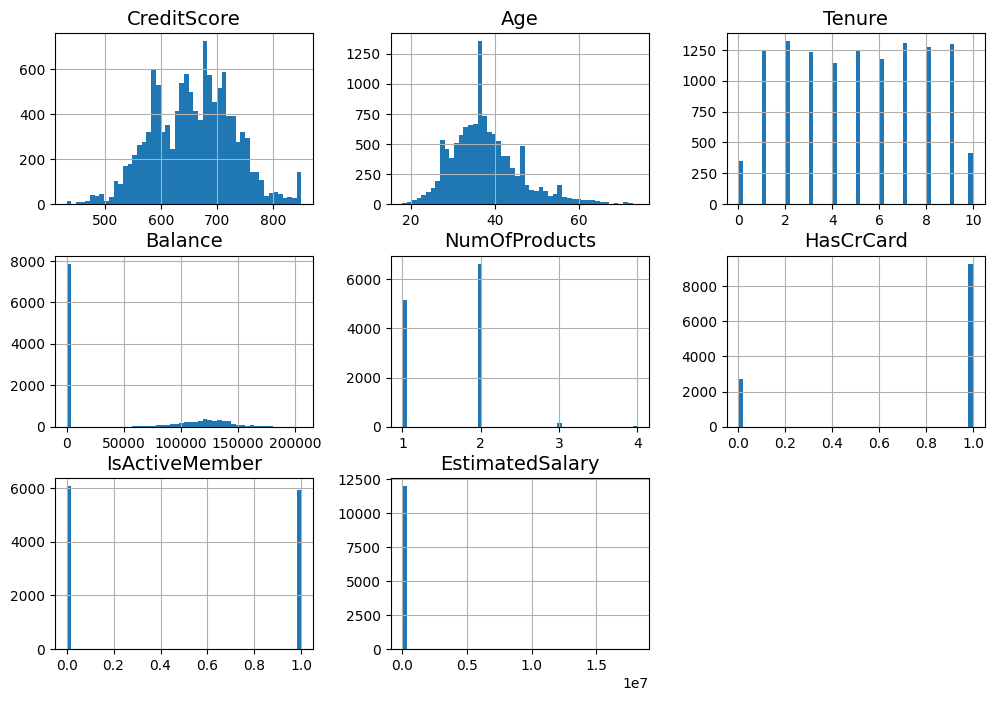

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X_train.hist(bins=50, figsize=(12, 8))

plt.show()

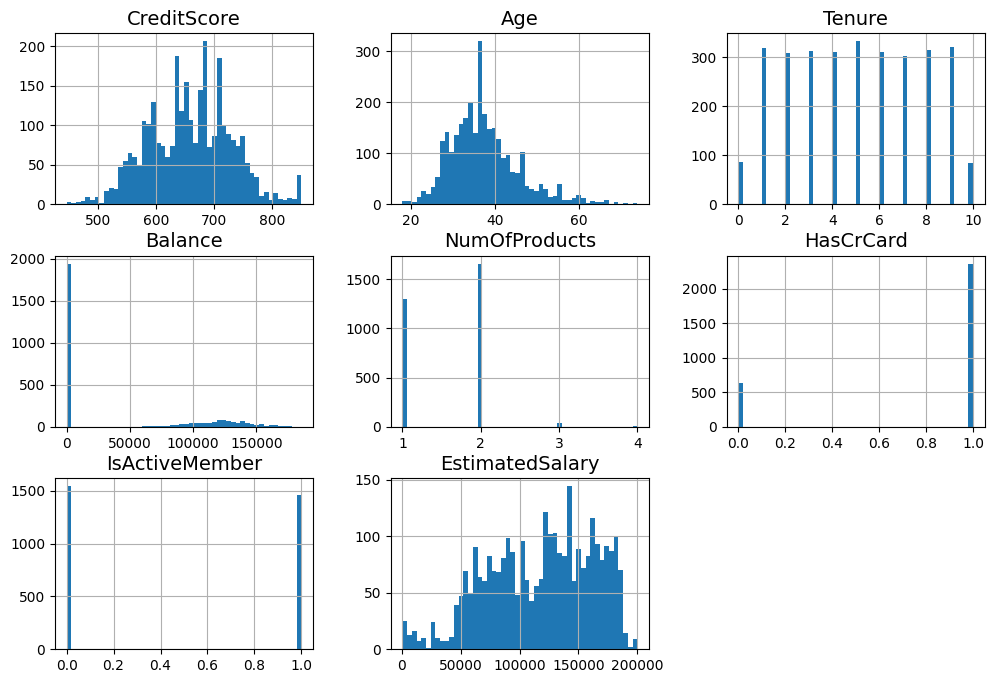

In [42]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X_test.hist(bins=50, figsize=(12, 8))

plt.show()

Categorical/Ordinal Data: Tenure
Catagorical/Ordinal Encoding Options:

    Option 1 Categorical Transformation for Tenure
    Option 2 Ordinal Transformation using pandas Replace method for CreditScore or EstimatedSalary
    Option 3 Target Encoding



Numerical Data Preprocessing: we-bull for the following paramters:
credit score,
age,
balance,
estimated salary

In [43]:
quant_attribs = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

### create pipelines

In [ ]:
cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])
numeric_pipeline = Pipeline([("numeric transform", StandardScaler())])
#cat_pipeline = "drop"
quantile_pipeline = Pipeline([("quantile transformer", QuantileTransformer(n_quantiles=100))])

preprocessings = [
ColumnTransformer([
    ("numeric", "passthrough", numeric_attribs),
    ("quant", "passthrough", quant_attribs),
    ("categorical", cat_pipeline, cat_attribs),
]),

ColumnTransformer([
    ("numeric", "passthrough", numeric_attribs),
    ("quant", quantile_pipeline, quant_attribs),
    ("categorical", cat_pipeline, cat_attribs),
]),

ColumnTransformer([
    ("numeric", numeric_pipeline, numeric_attribs),
    ("quant", quantile_pipeline, quant_attribs),
    ("categorical", cat_pipeline, cat_attribs),
], remainder="passthrough"),

ColumnTransformer([
    ("numeric", numeric_pipeline, numeric_attribs),
    ("quant", "passthrough", quant_attribs),
    ("categorical", cat_pipeline, cat_attribs)
])

]

# Build Models
### Simple Ensemble RandomForest, AdaBoost, DecisionTree

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier



In [ ]:
print("Building Classifiers")

def build_classifiers(i):
  pr= preprocessings[i]
  lr= make_pipeline(pr, LogisticRegression(random_state=42, verbose=0))
  dt= make_pipeline(pr, DecisionTreeClassifier(random_state=42))
  rf= make_pipeline(pr, RandomForestClassifier(random_state=42, verbose=0))
  sv= make_pipeline(pr, LinearSVC(class_weight= 'balanced', random_state=42, verbose= 0))
  knn= make_pipeline(pr, KNeighborsClassifier())
  ab= make_pipeline(pr, AdaBoostClassifier(random_state=42))
  hgb= make_pipeline(pr, HistGradientBoostingClassifier(random_state=42))
  et= make_pipeline(pr, ExtraTreesClassifier(random_state=42))
  gb= make_pipeline(pr, GradientBoostingClassifier(random_state=42))
  xgb= make_pipeline(pr, XGBClassifier(random_state=42))

  classifiers = {
      'Logistic Regression': lr,
      'Decision Tree': dt,
      'Random forest': rf,
      'SVM': sv,
      'K-Nearest Neighbors': knn,
      'Adaboost': ab,
      'HistGradientBoosting': hgb,
      'Extra Tree Classifier': et,
      'Gradient Boosting Classifier': gb,
      'XGB Classifier': xgb
  }
  return lr, dt, rf, sv, knn, ab, hgb, et, gb, xgb, classifiers, type(classifiers)


Building Classifiers


In [ ]:
y_train.shape

(12000,)

In [ ]:
import seaborn as sns
def get_predictions(i):
  bc= build_classifiers(i)
  classifiers = bc[10]
  predictions = {}
  for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions[name] = clf.predict(X_test)
    print(f"{name} predictions: {predictions}")

  # Create a matrix to capture the overlap in correct predictions
  overlap_matrix = np.zeros((len(classifiers), len(classifiers)))

  for i, (name1, pred1) in enumerate(predictions.items()):
      for j, (name2, pred2) in enumerate(predictions.items()):
          correct1 = (pred1 == y_test)
          correct2 = (pred2 == y_test)
          overlap = np.sum(correct1 & correct2) / np.sum(correct1 | correct2)
          overlap_matrix[i, j] = overlap
  overlap_df = pd.DataFrame(overlap_matrix, index=classifiers.keys(), columns=classifiers.keys())

  # Plot the overlap matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(overlap_df, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Overlap in Correct Predictions Between Classifiers')
  k= plt.show()
  return k


Logistic Regression predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.])}
Decision Tree predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.])}
Random forest predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.])}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.]), 'SVM': array([0., 0., 0., ..., 0., 0., 0.])}
K-Nearest Neighbors predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.]), 'SVM': array([0., 0., 0., ..., 0., 0., 0.]), 'K-Nearest Neighbors': array([1., 0., 0., ..., 0., 0., 0.])}
Adaboost predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.]), 'SVM': array([0., 0., 0., ..., 0., 0., 0.]), 'K-Nearest Neighbors': array([1., 0., 0., ..., 0., 0., 0.]), 'Adaboost': array([0., 0., 0., ..., 0., 0., 0.])}
HistGradientBoosting predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision

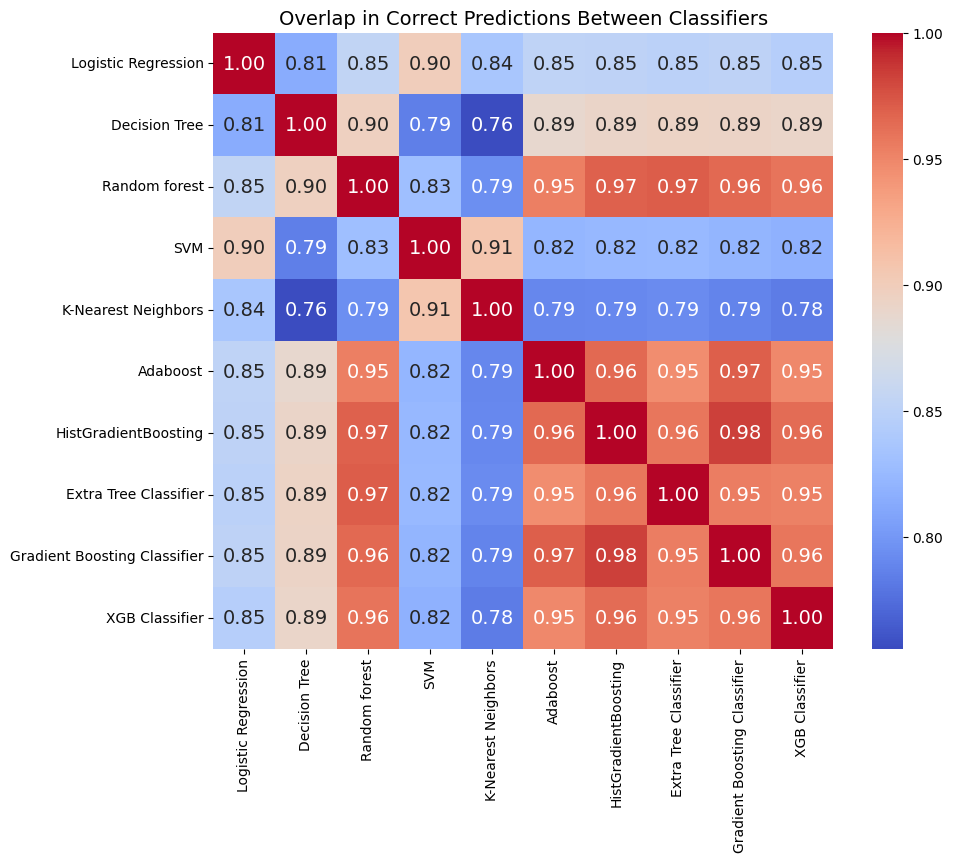

In [ ]:
get_predictions(0)


Preprocessor 1: we see that gradient boosting classifier, histgradientboosting, random forest, extra tree classifier, adaboost, XGB classifier are good

Logistic Regression predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.])}
Decision Tree predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.])}
Random forest predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.])}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.]), 'SVM': array([0., 0., 0., ..., 0., 0., 0.])}
K-Nearest Neighbors predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.]), 'SVM': array([0., 0., 0., ..., 0., 0., 0.]), 'K-Nearest Neighbors': array([1., 0., 0., ..., 0., 0., 0.])}
Adaboost predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.]), 'SVM': array([0., 0., 0., ..., 0., 0., 0.]), 'K-Nearest Neighbors': array([1., 0., 0., ..., 0., 0., 0.]), 'Adaboost': array([0., 0., 0., ..., 0., 0., 0.])}
HistGradientBoosting predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision

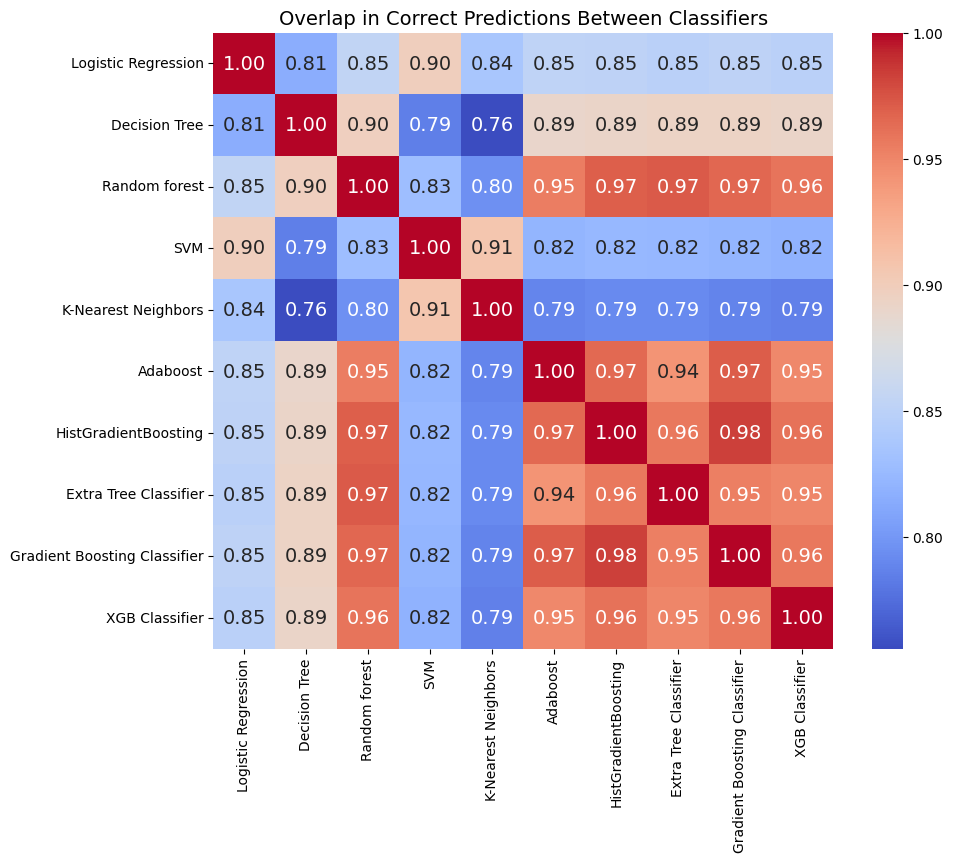

In [ ]:
get_predictions(1)

preprocessor 2: we can see that random forest, gradient boosting, extra tree classiifer, histgradientboosting, adaboost, XGB classifier are good in performance or predicting the target values

In [44]:
get_predictions(2)


NameError: name 'get_predictions' is not defined

preprocessor 2: we can see that random forest, gradient boosting, extra tree classiifer, histgradientboosting, adaboost, XGB classifier and logistic regression are good in performance or predicting the target values

Logistic Regression predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.])}
Decision Tree predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.])}
Random forest predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.])}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.]), 'SVM': array([0., 0., 0., ..., 0., 0., 0.])}
K-Nearest Neighbors predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.]), 'SVM': array([0., 0., 0., ..., 0., 0., 0.]), 'K-Nearest Neighbors': array([1., 0., 0., ..., 0., 0., 0.])}
Adaboost predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision Tree': array([1., 0., 0., ..., 0., 0., 0.]), 'Random forest': array([0., 0., 0., ..., 0., 0., 0.]), 'SVM': array([0., 0., 0., ..., 0., 0., 0.]), 'K-Nearest Neighbors': array([1., 0., 0., ..., 0., 0., 0.]), 'Adaboost': array([0., 0., 0., ..., 0., 0., 0.])}
HistGradientBoosting predictions: {'Logistic Regression': array([0., 0., 0., ..., 0., 0., 0.]), 'Decision

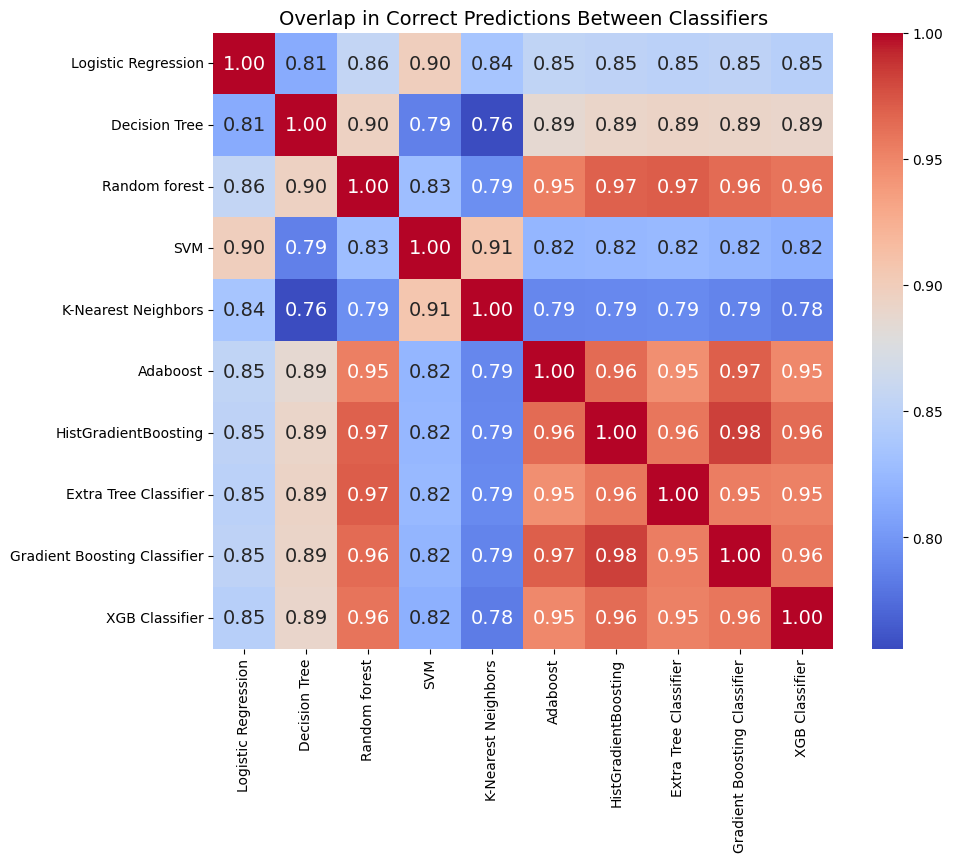

In [ ]:
get_predictions(3)

preprocessor 2: we can see that random forest, gradient boosting, extra tree classiifer, histgradientboosting, adaboost, XGB classifier are good in performance or predicting the target values

#Voting and Stacking

In [ ]:
#Voting- random forest, gradient boosting,
#extra tree classiifer, histgradientboosting, adaboost, XGB classifier
def voting(i):
  bc= build_classifiers(i)
  ab= bc[5]
  hgb= bc[6]
  lr= bc[0]
  rf= bc[2]
  et= bc[7]
  gb= bc[8]
  xgb= bc[9]
  classifiers = bc[10]
  vclf1 = VotingClassifier(estimators=[
        ('ab', ab), ('hgb', hgb), ('rf', rf),('et',et),('xgb',xgb)], voting='hard', weights=[1, 1, 1, 1, 1],verbose=False)
  vclf1 = vclf1.fit(X_train, y_train)
  accuracy_vclf1 = vclf1.score(X_test, y_test)
 # print("Voting:", accuracy_vclf1)
  return vclf1, accuracy_vclf1

# Stacking with LogisticRegression
#fe = make_pipeline(pr, DecisionTreeClassifier(random_state=42))
def stacking(i):
  bc= build_classifiers(i)
  ab= bc[5]
  hgb= bc[6]
  lr= bc[0]
  rf= bc[2]
  et= bc[7]
  gb= bc[8]
  xgb= bc[9]
  classifiers = bc[10]
  sclf1 = StackingClassifier(estimators=[
          ('ab', ab), ('hgb', hgb), ('rf', rf),('et',et),('xgb',xgb)])
  sclf1 = sclf1.fit(X_train, y_train)
  accuracy_sclf1 = sclf1.score(X_test, y_test)
#  print("Stacking:",accuracy_sclf1)
  return sclf1, accuracy_sclf1

In [ ]:
for i in range(4):
  print("voting and stacking for preprocessor ",i)
  v= voting(i)
  print(v[1])
  s= stacking(i)
  print(s[1])
  print("\n\n")

voting and stacking for preprocessor  0
0.9006666666666666
0.9036666666666666



voting and stacking for preprocessor  1
0.9006666666666666
0.9046666666666666



voting and stacking for preprocessor  2
0.901
0.9033333333333333



voting and stacking for preprocessor  3
0.9003333333333333
0.9036666666666666





We see that the 2nd preprocessor is giving comparatively highest accuracy although all preprocessors are giving good accuracy

# LightGBM

In [45]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [ ]:
# Create the LightGBM classifier
lgbm = make_pipeline(preprocessings[1], LGBMClassifier(random_state=42))
# Train the classifier
lgbm.fit(X_train, y_train)
# Evaluate the classifier
accuracy_lgbm = lgbm.score(X_test, y_test)
print(accuracy_lgbm)

[LightGBM] [Info] Number of positive: 2420, number of negative: 9580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1659
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201667 -> initscore=-1.375910
[LightGBM] [Info] Start training from score -1.375910
0.9063333333333333


#Optimizing hyperparameters

###Optimizing hyperparameters for LightGBM and CatBoost: Using manual hyperparameter optimization

####Lightgbm

In [ ]:
params = {
    "boosting_type": "dart",
    #"drop_rate" : 0.1,
#    "boosting_type": "gbdt",
    "objective": "binary",
 #   "is_unbalance": True,
    "num_leaves": 40, #default=30
    "learning_rate": 0.01, #default = 0.1 #keep reducing the values to 0.1,0.5 to see the impact
    "n_estimators": 2000,
    "max_depth": 40,
    "min_data_in_leaf": 1,
    "num_iterations": 2000,
    "max_bin": 1000,
    "bagging_fraction": 0.8,
    "bagging_freq": 10,
    "pos_bagging_fraction": 0.7,
    "neg_bagging_fraction": 0.3,
    "bagging_seed": 999,
    "verbose": 0,
    "random_state": 42
}

#lgbm_params =  make_pipeline(preprocessing, LGBMClassifier(**params))
lgbm_params =  LGBMClassifier(**params)

In [ ]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()

#setting categorical and numerical paramters as category
#see the link to see why numerical parameters work best as categories
#https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html

for c in cat_attribs + numeric_attribs:
    X_train2[c] = X_train2[c].astype('category')

for c in cat_attribs + numeric_attribs:
    X_test2[c] = X_test2[c].astype('category')

In [ ]:
lgbm_params.fit(X_train2, y_train, categorical_feature="auto")
accuracy_lgbm_params = lgbm_params.score(X_test2, y_test)
print(accuracy_lgbm_params)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will b

####Catboost

In [47]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'Accuracy', # metric
          'learning_rate':0.01, # learning rate
          'iterations':1000, # number of iterations
     #     'auto_class_weights':'Balanced', # automatically adjust class weights
     #     'boost_from_average':True, # boost from average
     #     'min_data_in_leaf':10, # minimum number of data points in a leaf, default is 1
          'random_seed': 42,
          'logging_level':'Silent'
         }

In [ ]:
cat_model = CatBoostClassifier(**params)

In [ ]:
cat_model.fit(
    X_train, y_train,
    cat_features=cat_attribs,
    eval_set=(X_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=False
);

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=7]=1.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [ ]:
accuracy_cat = cat_model.score(X_test, y_test)
print(accuracy_cat)

###Optimizing hyperparameters for each classifier: Using optimization methods

###Grid search

In [ ]:
svc_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__degree': [2, 3, 4, 5],
    'classifier__gamma': ['scale', 'auto']
}

# create set of parameters to explore using grid search for DecisionTreeClassifier
dt_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__min_samples_split': [2, 4, 6, 8]
}

# create set of parameters to explore using grid search for RandomForestClassifier
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__min_samples_split': [2, 4, 6, 8]
}

# create set of parameters to explore using grid search for AdaBoostClassifier
ada_param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.1, 0.5, 1, 1.5]
}

param_grids = [svc_param_grid, dt_param_grid, rf_param_grid, ada_param_grid]


In [ ]:
# Define a scoring function using f1 metric and positive label as 'bad'
from sklearn.metrics import f1_score, make_scorer
f1_score_pos = make_scorer(f1_score, pos_label='bad')

# Define a scoring function using fbeta metric with beta as 1.2 and positive label as 'bad'
from sklearn.metrics import fbeta_score
fbeta_score_pos = make_scorer(fbeta_score, beta=1.2, pos_label='bad')

scoring_fn = f1_score_pos


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline


In [ ]:
classifiers = [
    SVC(probability=True, random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42)
]

In [ ]:
from sklearn.model_selection import GridSearchCV
#bc = build_classifiers(1)[10]
GridSearchResults = []
for classifier, param_grid in zip(classifiers, param_grids):
    pipe = Pipeline([
        ('preprocessing', preprocessings[1]),
        ('classifier', classifier)
    ])
    #grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)
    grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1, scoring= scoring_fn)

    grid_search.fit(X_train, y_train)

    GridSearchResults.append(grid_search)
#print('\n Gridsearch results for scoring:',score)



Fitting 5 folds for each of 40 candidates, totalling 200 fits


AttributeError: 'str' object has no attribute 'set_params'

In [ ]:
for i, gs in enumerate(GridSearchResults):
    print(f"Best parameters for {gs.estimator.named_steps['classifier'].__class__.__name__}: ", gs.best_params_)
    print(f"Best score for {gs.estimator.named_steps['classifier'].__class__.__name__}: ", gs.best_score_)
    #print(f"Test score for {gs.estimator.named_steps['classifier'].__class__.__name__}: ", gs.score(X_test, y_test))
    print("\n\n")

###Randomised Search

In [ ]:
# prompt: randomise search parameter optimization

from sklearn.model_selection import RandomizedSearchCV


RandomSearchResults = []
for classifier, param_grid in zip(classifiers, param_grids):
    pipe = Pipeline([
        ('preprocessing', preprocessings[1]),
        ('classifier', classifier)
    ])
    #grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)
    random_search = RandomizedSearchCV(pipe, param_grid, cv=5, scoring= scoring_fn, n_iter=10, random_state=42)


    random_search.fit(X_train, y_train)
    RandomSearchResults.append(random_search)



In [ ]:
print("Results:")

for i, rs in enumerate(RandomSearchResults):
    print(f"Best parameters for {gs.estimator.named_steps['classifier'].__class__.__name__}: ", rs.best_params_)
    print(f"Best score for {gs.estimator.named_steps['classifier'].__class__.__name__}: ", rs.best_score_)
    #print(f"Test score for {gs.estimator.named_steps['classifier'].__class__.__name__}: ", rs.score(X_test, y_test))
    print("\n\n")


#Optimizing hyperparameters for each voting and stacking

In [ ]:
bc= build_classifiers(1)
ab= bc[5]
hgb= bc[6]
lr= bc[0]
rf= bc[2]
dt= bc[3]
sv= bc[4]
classifiers = bc[10]

In [ ]:
# prompt: parameters for optimizing voting and stacking
# create set of parameters to explore using grid search for voting classifier
vclf1_param_grid = {
    'classifier__voting__estimators': [('ab', ab), ('rf', rf),('dt',dt), ('sv',sv)],
    'classifier__voting__voting': ['hard', 'soft'],
    'classifier__voting__weights': [[1, 1, 1, 1, 1], [2, 2, 1, 1, 1], [1, 2, 2, 1, 1], [1, 1, 2, 2, 1], [1, 1, 1, 2, 2]]
}

# create set of parameters to explore using grid search for stacking classifier
sclf1_param_grid = {
    'classifier__stacking__estimators': [('ab', ab),  ('rf', rf), ('dt',dt), ('sv',sv)],
    'classifier__stacking__final_estimator': [SVC(probability=True, random_state=42), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),
                                              AdaBoostClassifier(random_state=42)]

}

param_grids = [vclf1_param_grid, sclf1_param_grid]

#scoring_fn = f1_score_pos
scoring_fns= [ f1_score_pos, fbeta_score_pos]




In [ ]:
# Define a scoring function using f1 metric and positive label as 'bad'
f1_score_pos = make_scorer(f1_score, pos_label='bad')

# Define a scoring function using fbeta metric with beta as 1.2 and positive label as 'bad'
fbeta_score_pos = make_scorer(fbeta_score, beta=1.2, pos_label='bad')


In [ ]:
from sklearn.model_selection import GridSearchCV
bc= build_classifiers(1)[10]
vclf1= voting(1)[0]
sclf1= stacking(1)[0]
for scoring_fn in scoring_fns:
  GridSearchResults = []
  for classifier, param_grid in zip([vclf1, sclf1], param_grids):
      pipe = Pipeline([
          ('preprocessing', preprocessings[1]),
          ('classifier', classifier)
      ])
      #grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring= scoring_fn, verbose=1, n_jobs=-1)
      grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1, scoring=scoring_fn)

      grid_search.fit(X_train, y_train)

      GridSearchResults.append(grid_search)
  print("Results for :", scoring_fn)
  print("\n\n")

  for i, gs in enumerate(GridSearchResults):
      print(f"Best parameters for {gs.estimator.named_steps['classifier'].__class__.__name__}: ", gs.best_params_)
      print(f"Best score for {gs.estimator.named_steps['classifier'].__class__.__name__}: ", gs.best_score_)
      #print(f"Test score for {gs.estimator.named_steps['classifier'].__class__.__name__}: ", gs.score(X_test, y_test))
      print("\n\n")

Fitting 5 folds for each of 40 candidates, totalling 200 fits


AttributeError: 'str' object has no attribute 'set_params'

# Redefining voting and stacking

In [ ]:
#Voting- random forest, gradient boosting,
#extra tree classiifer, histgradientboosting, adaboost, XGB classifier
def voting(i):
  bc= build_classifiers1(i)
  ab= bc[5]
  hgb= bc[6]
  lr= bc[0]
  rf= bc[2]
  classifiers = bc[10]
  vclf1 = VotingClassifier(estimators=[
        ('ab', ab), ('hgb', hgb), ('rf', rf),('et',et),('xgb',xgb)], voting='hard', weights=[1, 1, 1, 1, 1],verbose=False)
  vclf1 = vclf1.fit(X_train, y_train)
  accuracy_vclf1 = vclf1.score(X_test, y_test)
  print("Voting:", accuracy_vclf1)

# Stacking with LogisticRegression
#fe = make_pipeline(pr, DecisionTreeClassifier(random_state=42))
def stacking(i):
  bc= build_classifiers1(i)
  ab= bc[5]
  hgb= bc[6]
  lr= bc[0]
  rf= bc[2]
  classifiers = bc[10]
  sclf1 = StackingClassifier(estimators=[
          ('ab', ab), ('hgb', hgb), ('rf', rf),('et',et),('xgb',xgb)])
  sclf1 = sclf1.fit(X_train, y_train)
  accuracy_sclf1 = sclf1.score(X_test, y_test)
  print("Stacking:",accuracy_sclf1)


In [ ]:
for i in range(4):
  print("voting and stacking for preprocessor ",i)
  v= voting(i)
  print(v[1])
  s= stacking(i)
  print(s[1])
  print("\n\n")

## Confusion Matrix

In [ ]:
# Plot the confusion matrix for all the best classifiers in GridSearchResults
# Stop predictions from printing to console

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store classifier names, predictions, and probabilities
classifier_predictions = {}
classifier_probabilities = {}

# Iterate through all the results
for i, gs in enumerate(GridSearchResults):

    # Predict on X_test
    y_pred = gs.best_estimator_.predict(X_test)
    y_score = gs.best_estimator_.predict_proba(X_test)[:, 1]

    # Store in dictionary
    classifier_name = gs.estimator.named_steps['classifier'].__class__.__name__
    classifier_predictions[classifier_name] = y_pred
    classifier_probabilities[classifier_name] = y_score


In [ ]:
# Print confusion matrix for each classifier in ClassifierPredictions

for classifier_name, predictions in classifier_predictions.items():
    cm = confusion_matrix(y_test, predictions)
    labels = ['Bad', 'Good']
    print(f"Confusion matrix for {classifier_name}:")
    # plot confusion matrix including actual numbers
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  xticklabels=labels, yticklabels=labels)
    print("\n\n")
    plt.show()


In [ ]:
# Print first five predictions for each classifier in classifier_predictions
for classifier_name, predictions in classifier_predictions.items():
    print(f"Predictions for {classifier_name}:")
    print(predictions[:5])
    print("\n\n")

In [ ]:
from sklearn.metrics import classification_report
# Print classification report for each classifier in classifier_predictions
for classifier_name, predictions in classifier_predictions.items():
    print(f"Classification report for {classifier_name}:")
    print(classification_report(y_test, predictions))
    print("\n\n")

In [ ]:
from sklearn.metrics import roc_auc_score
# Print the roc_auc_score for each classifier in classifier_predictions
for classifier_name, predictions in classifier_probabilities.items():
    print(f"ROC AUC score for {classifier_name}:")
    print(roc_auc_score(y_test, predictions))
    print("\n\n")

In [ ]:
validate_df

We select the classifiers with the highest accuracy based on hyper parameter tuning and use voting to fit and predict y_values for the remaining data

  return lr, dt, rf, sv, knn, ab, hgb, et, gb, xgb, classifiers, type(classifiers)



In [ ]:
def voting1(i):
  bc= build_classifiers(i)
  ab=
  hgb= bc[6]
  lr= bc[0]
  rf= bc[2]
  classifiers = bc[10]
  vclf1 = VotingClassifier(estimators=[
        ('ab', ab), ('hgb', hgb), ('rf', rf),('et',et),('xgb',xgb)], voting='hard', weights=[1, 1, 1, 1, 1],verbose=False)
  vclf1 = vclf1.fit(X_train, y_train)
  accuracy_vclf1 = vclf1.score(X_test, y_test)
  print("Voting:", accuracy_vclf1)

In [ ]:
voting1(1)


In [49]:
final= voting(1)[0]

In [51]:
fin_result= final.predict(validate_df)

In [55]:
validate_df['id']

0       15000
1       15001
2       15002
3       15003
4       15004
        ...  
9995    24995
9996    24996
9997    24997
9998    24998
9999    24999
Name: id, Length: 10000, dtype: int64

In [57]:
# prompt: download fin_result as csv to a certain location

final_df = pd.DataFrame({
    "id": validate_df['id'],
    "target": fin_result
})


# Create a Pandas DataFrame from the fin_result array
final_df = pd.DataFrame({'id': validate_df['id'], 'target': fin_result})

# Set the filename and path
filename = 'fin_result.csv'
path = r'C:\Users\STSC\Desktop\BAN 674- Machine Learning\Assignment 4\fin_result.csv'

# Export the DataFrame to a CSV file
final_df.to_csv(path, index=False)

# Download the CSV file
files.download(path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>